In [1]:
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [2]:
YP = pd.read_csv(r'/mnt/g/nelson_new/OP2.csv', header = 0, index_col=0)

In [3]:
YP

ANN9  nearest    surface     dmp1     fgf23     sost
ID                                                              
67630   117.2170  74.6860  -0.115270  835.154  303.3390  351.913
67632    43.3083  19.0620  -4.757660  713.896   79.4779  165.924
67633    38.4046  19.4849  -5.593550  699.213   64.0239  160.358
67634    43.1519  19.0620  -4.833570  712.258   70.7052  148.485
67635    37.9039  18.6230  -0.406739  797.277  149.2260  167.138
...          ...      ...        ...      ...       ...      ...
101440   55.7044  32.8195 -12.359500  157.761  148.0850  182.280
101441   57.5196  32.8195 -10.816300  131.268  137.9260  161.043
101442   64.4366  19.3467 -22.783900  114.489   97.4181  138.434
101443   65.8958  38.4622 -10.612100  143.860  126.2400  167.465
101444   63.1701  28.3203  -3.046540  402.399  208.3340  285.603

[33774 rows x 6 columns]

In [4]:
YP_subset = YP.sample(n = 2000)

In [5]:
YP_subset_original = YP.sample(n = 2000)

In [6]:
YP_subset_UMAP = YP_subset

In [7]:
YP_subset

ANN9   nearest    surface      dmp1      fgf23       sost
ID                                                                  
100853  47.7358  26.97260   -7.89002   43.1094   51.84530   90.13980
92598   33.1517  19.06850   -7.37368   67.0932  170.72300   98.66110
80675   31.1968  12.63460  -70.92170   40.4714    7.92217   28.89400
99678   34.1591  16.72960   -7.83635  142.5220   61.51980  102.85400
79515   55.1474  22.02570   -8.37277  213.9620  211.77700  118.13700
...         ...       ...        ...       ...        ...        ...
95241   37.7588  16.20510  -19.04590   21.4052   16.35820   14.06380
83445   51.8233   7.30604   -4.04351   70.8611   12.02090   72.64580
78009   30.3668  21.20350 -106.84500   38.8419    3.22898    5.91786
80141   37.5776  16.35370   -7.43528   48.1536   33.16000   62.76490
82952   27.3315   9.38004  -33.06390   16.6949   56.30830   68.35410

[2000 rows x 6 columns]

In [8]:
from plotly.offline import init_notebook_mode, iplot

In [9]:

from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
import plotly.graph_objects as go
import numpy as np

In [10]:
corr = YP_subset.corr()
trace = go.Heatmap(z=corr,x=corr.index,y=corr.columns)
data = [trace]
layout = dict(title="Correlation Plot of Player Skills")
fig = dict(data=data, layout=layout)
iplot(fig)

In [11]:
from sklearn.decomposition import PCA
pca = PCA().fit(YP_subset)

In [14]:
pcaratio = pca.explained_variance_ratio_
trace = go.Scatter(x=np.arange(len(pcaratio)),y=np.cumsum(pcaratio))
data = [trace]
layout = dict(title="YOPRO+ Dataset - PCA Explained Variance || 100% achieved at 5 components")
fig = dict(data=data, layout=layout)
iplot(fig)

In [15]:
pca = PCA(n_components=5)
skillsPCA = pca.fit_transform(YP_subset)

In [16]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=5)
skillsPCA_labels = kmeans.fit_predict(skillsPCA)

In [17]:

X=YP_subset
scaler = MinMaxScaler()
scaler.fit(X)
X=scaler.transform(X)
inertia = []
for i in range(1,11):
    kmeans = KMeans(
        n_clusters=i, init="k-means++",
        n_init=10,
        tol=1e-04, random_state=42
    )
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)
fig = go.Figure(data=go.Scatter(x=np.arange(1,11),y=inertia))
fig.update_layout(title="Inertia vs Cluster Number",xaxis=dict(range=[0,11],title="Cluster Number"),
                  yaxis={'title':'Inertia'},
                 annotations=[
        dict(
            x=3,
            y=inertia[2],
            xref="x",
            yref="y",
            text="Elbow!",
            showarrow=True,
            arrowhead=7,
            ax=20,
            ay=-40
        )
    ])

In [18]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=5)
skillsPCA_labels = kmeans.fit_predict(skillsPCA)

In [19]:
dfskillsPCA = pd.DataFrame(skillsPCA)
dfskillsPCA['cluster'] = skillsPCA_labels

In [20]:
dfskillsPCA

0           1           2          3          4  cluster
0    -112.257835    5.885066   -7.895353 -18.315278  12.340119        4
1     -86.349472   72.537066   89.316909  -4.813218  -4.650724        0
2    -119.875984  -76.630857  -16.295972  35.158189  -6.112344        4
3     -12.371251   16.533681   -5.274413 -13.693652  -5.021775        3
4      61.885229  103.107813  115.831831   3.323064  11.923085        3
...          ...         ...         ...        ...        ...      ...
1995 -138.234595  -77.329274    0.545411 -17.342790  -1.215303        4
1996  -85.826782  -30.137339  -32.518567 -27.381783   1.338479        4
1997 -123.430830 -102.978996   -9.758401  68.192050   1.095679        4
1998 -108.801590  -27.261538   -9.655731 -22.353266  -2.147176        4
1999 -140.301366  -12.545140    5.738362   5.878859 -13.230778        4

[2000 rows x 6 columns]

In [21]:
from sklearn.manifold import TSNE
X1 = dfskillsPCA.iloc[:,:-1]
Xtsne = TSNE(n_components=2).fit_transform(X1)
dftsne = pd.DataFrame(Xtsne)
dftsne['cluster'] = skillsPCA_labels
dftsne.columns = ['x1','x2','cluster']

/home/mcrewcow/anaconda3/lib/python3.7/site-packages/sklearn/manifold/_t_sne.py:783: FutureWarning:

The default initialization in TSNE will change from 'random' to 'pca' in 1.2.

/home/mcrewcow/anaconda3/lib/python3.7/site-packages/sklearn/manifold/_t_sne.py:793: FutureWarning:

The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.



In [22]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [23]:
skillsPCA_labels

array([4, 0, 4, ..., 4, 4, 4], dtype=int32)

In [24]:
YP_subset['cluster'] = skillsPCA_labels

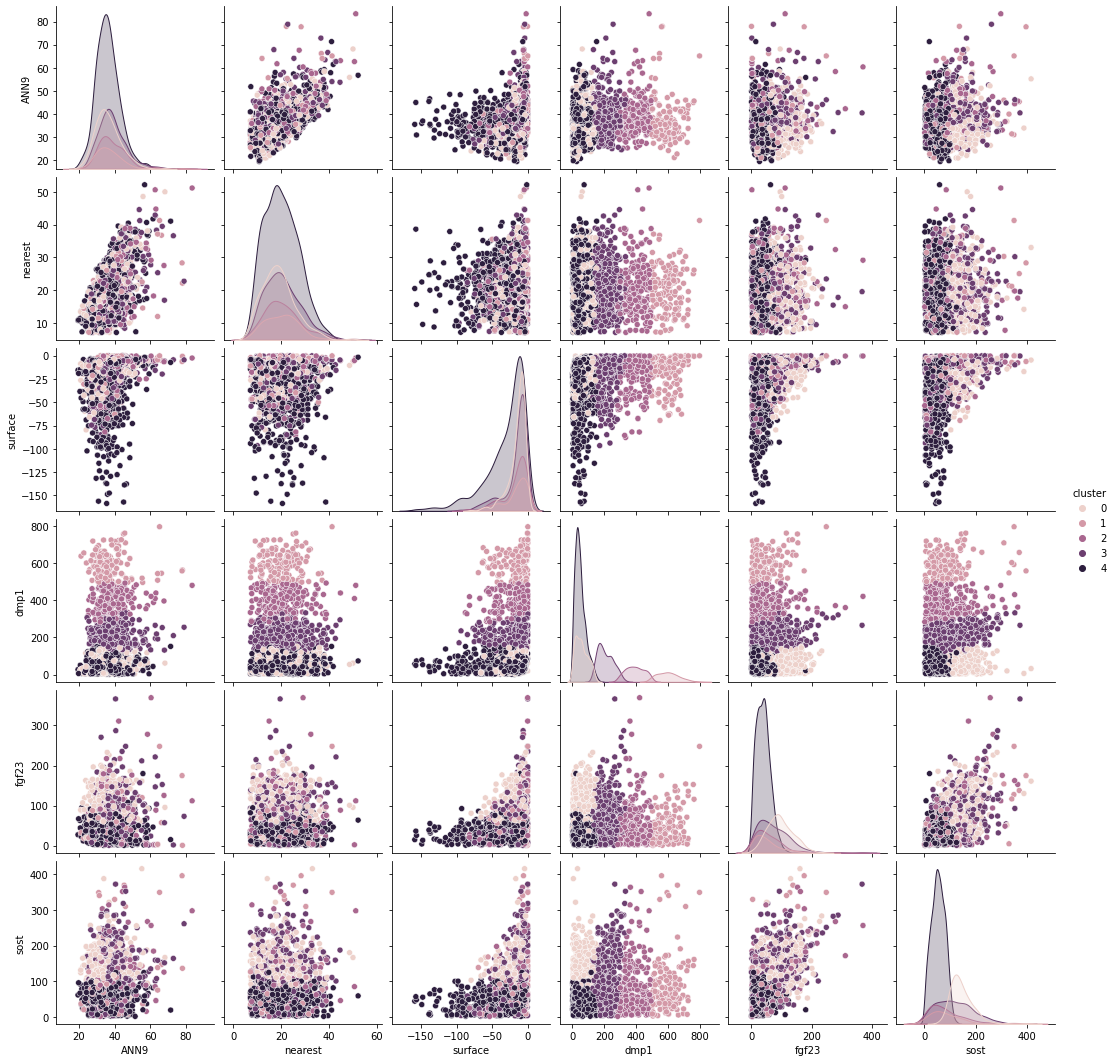

In [25]:
sns.pairplot(YP_subset, hue='cluster');

In [26]:
pca2 = PCA(n_components=2)
skillsPCA2 = pca2.fit_transform(YP_subset)
dfskillsPCA2 = pd.DataFrame(skillsPCA2)
dfskillsPCA2['cluster'] = skillsPCA_labels
dfskillsPCA2.columns = ['x1','x2','cluster']

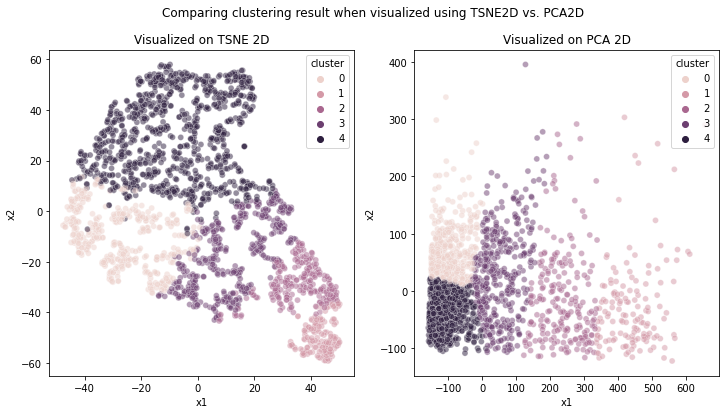

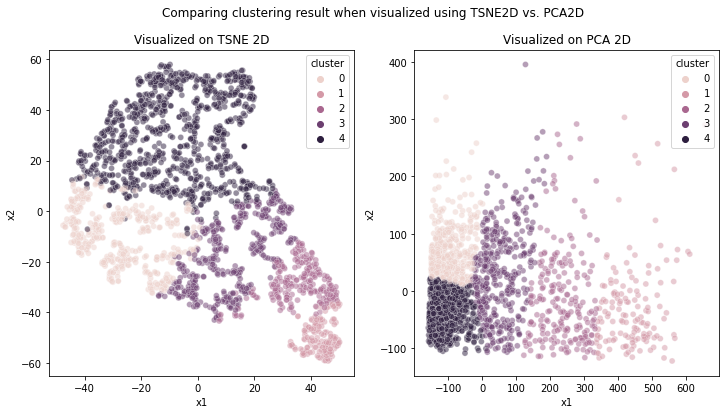

In [27]:
fig, ax = plt.subplots(1, 2, figsize=(12,6))
sns.scatterplot(data=dftsne,x='x1',y='x2',hue='cluster',legend="full",alpha=0.5,ax=ax[0])
ax[0].set_title('Visualized on TSNE 2D')
sns.scatterplot(data=dfskillsPCA2,x='x1',y='x2',hue='cluster',legend="full",alpha=0.5,ax=ax[1])
ax[1].set_title('Visualized on PCA 2D')
fig.suptitle('Comparing clustering result when visualized using TSNE2D vs. PCA2D')
display(fig)

In [28]:
import umap

In [29]:
reducer = umap.UMAP()

In [30]:
YP_subset_UMAP

ANN9   nearest    surface      dmp1      fgf23       sost  cluster
ID                                                                           
100853  47.7358  26.97260   -7.89002   43.1094   51.84530   90.13980        4
92598   33.1517  19.06850   -7.37368   67.0932  170.72300   98.66110        0
80675   31.1968  12.63460  -70.92170   40.4714    7.92217   28.89400        4
99678   34.1591  16.72960   -7.83635  142.5220   61.51980  102.85400        3
79515   55.1474  22.02570   -8.37277  213.9620  211.77700  118.13700        3
...         ...       ...        ...       ...        ...        ...      ...
95241   37.7588  16.20510  -19.04590   21.4052   16.35820   14.06380        4
83445   51.8233   7.30604   -4.04351   70.8611   12.02090   72.64580        4
78009   30.3668  21.20350 -106.84500   38.8419    3.22898    5.91786        4
80141   37.5776  16.35370   -7.43528   48.1536   33.16000   62.76490        4
82952   27.3315   9.38004  -33.06390   16.6949   56.30830   68.35410        4

[2000 rows x 7 columns]

In [31]:
import numpy as np
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
%matplotlib inline

In [32]:
data = YP_subset_UMAP[
    [
        "ANN9",
        "dmp1",
        "fgf23",
        "sost",
        'nearest',
        'surface'
    ] 
].values
scaled_data = StandardScaler().fit_transform(data)

In [33]:
embedding = reducer.fit_transform(scaled_data)
embedding.shape

(2000, 2)

In [34]:
embedding

array([[ 7.7027383,  6.602433 ],
       [ 9.172016 , 10.773432 ],
       [ 1.1921018,  8.478619 ],
       ...,
       [ 1.0105917,  7.5297503],
       [ 5.885084 ,  9.066049 ],
       [ 6.149296 , 11.979334 ]], dtype=float32)

In [35]:
embedding = pd.DataFrame(embedding)
embedding['cluster'] = skillsPCA_labels

In [36]:
embedding

0          1  cluster
0     7.702738   6.602433        4
1     9.172016  10.773432        0
2     1.192102   8.478619        4
3     7.640721   9.537440        3
4     9.349032   7.278842        3
...        ...        ...      ...
1995  3.768217   9.698545        4
1996  6.391961   8.517070        4
1997  1.010592   7.529750        4
1998  5.885084   9.066049        4
1999  6.149296  11.979334        4

[2000 rows x 3 columns]

In [37]:
embedding.columns = ['x1','x2','cluster']

In [38]:
embedding

x1         x2  cluster
0     7.702738   6.602433        4
1     9.172016  10.773432        0
2     1.192102   8.478619        4
3     7.640721   9.537440        3
4     9.349032   7.278842        3
...        ...        ...      ...
1995  3.768217   9.698545        4
1996  6.391961   8.517070        4
1997  1.010592   7.529750        4
1998  5.885084   9.066049        4
1999  6.149296  11.979334        4

[2000 rows x 3 columns]

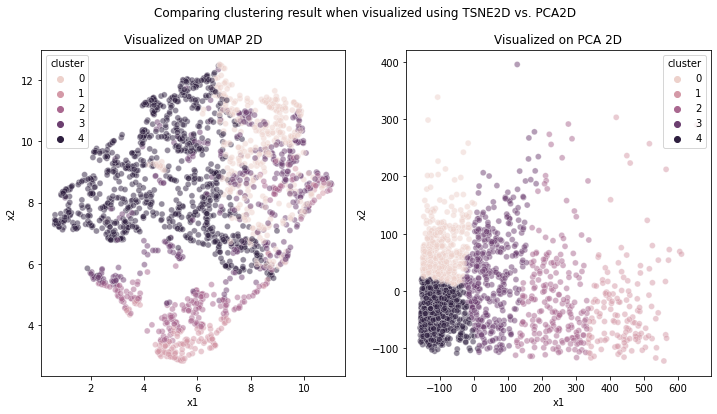

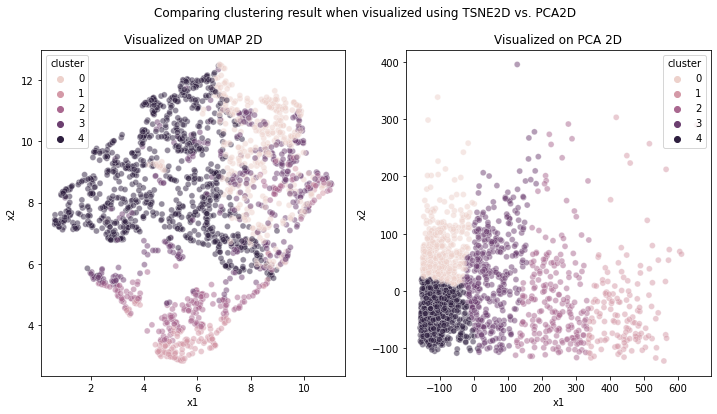

In [39]:
fig, ax = plt.subplots(1, 2, figsize=(12,6))
sns.scatterplot(data=embedding,x='x1',y='x2',hue='cluster',legend="full",alpha=0.5,ax=ax[0])
ax[0].set_title('Visualized on UMAP 2D')
sns.scatterplot(data=dfskillsPCA2,x='x1',y='x2',hue='cluster',legend="full",alpha=0.5,ax=ax[1])
ax[1].set_title('Visualized on PCA 2D')
fig.suptitle('Comparing clustering result when visualized using TSNE2D vs. PCA2D')
display(fig)

In [40]:
YP_subset_original

ANN9   nearest   surface       dmp1     fgf23      sost
ID                                                               
80380  24.3204  16.35390 -90.65670   27.66990   35.5639   22.8911
95808  39.4250  30.85590 -11.83080   58.22920   80.2886   81.2577
92821  36.4035  21.26880 -51.24430   10.04010   34.4278   23.9947
75107  25.3291   9.67658 -35.61570  169.38000   17.1152   31.2353
97458  25.3313  11.27870 -11.02420   36.52120   24.7475   72.3528
...        ...       ...       ...        ...       ...       ...
89763  33.5411   8.46561 -61.56540   54.99390   21.9209   48.4912
92845  32.9075  21.61090 -37.46430    2.77073   46.5737   42.1039
83226  31.8960  15.80790 -20.39790   48.26180   33.7675   51.3079
77475  39.8487  15.24240  -0.25001  242.71700  153.0100  251.5110
94621  31.8141  22.36270 -29.44650   34.96050   37.1693   83.6427

[2000 rows x 6 columns]

In [41]:
import plotly.express as px

In [42]:
fig2 = px.scatter_3d(YP_subset_original, x="dmp1", y="fgf23",z="sost",
                     color="ANN9")
fig2.update_layout(title="4 Features Representation")
fig2.show()

In [43]:
dftsne

x1         x2  cluster
0    -15.610320  14.870173        4
1    -35.490135 -10.784863        0
2     12.991099  53.640606        4
3      3.354803  -7.936099        3
4     -2.891042 -36.866859        3
...         ...        ...      ...
1995 -12.594082  51.972778        4
1996 -10.712993  10.723565        4
1997  18.005621  51.453903        4
1998 -13.705894  22.069376        4
1999 -34.580982  25.386311        4

[2000 rows x 3 columns]

In [44]:
YP_subset_UMAP

ANN9   nearest    surface      dmp1      fgf23       sost  cluster
ID                                                                           
100853  47.7358  26.97260   -7.89002   43.1094   51.84530   90.13980        4
92598   33.1517  19.06850   -7.37368   67.0932  170.72300   98.66110        0
80675   31.1968  12.63460  -70.92170   40.4714    7.92217   28.89400        4
99678   34.1591  16.72960   -7.83635  142.5220   61.51980  102.85400        3
79515   55.1474  22.02570   -8.37277  213.9620  211.77700  118.13700        3
...         ...       ...        ...       ...        ...        ...      ...
95241   37.7588  16.20510  -19.04590   21.4052   16.35820   14.06380        4
83445   51.8233   7.30604   -4.04351   70.8611   12.02090   72.64580        4
78009   30.3668  21.20350 -106.84500   38.8419    3.22898    5.91786        4
80141   37.5776  16.35370   -7.43528   48.1536   33.16000   62.76490        4
82952   27.3315   9.38004  -33.06390   16.6949   56.30830   68.35410        4

[2000 rows x 7 columns]

In [45]:
avgs_raw = YP_subset_UMAP

In [46]:
avgs_raw = avgs_raw.groupby('cluster').mean()

In [47]:
avgs_raw['surface'] = avgs_raw['surface'].abs()

In [50]:
avgs_raw_new = avgs_raw.reindex(columns=['ANN9', 'nearest', 'surface', 'dmp1', 'fgf23', 'sost'])

<AxesSubplot:xlabel='cluster'>

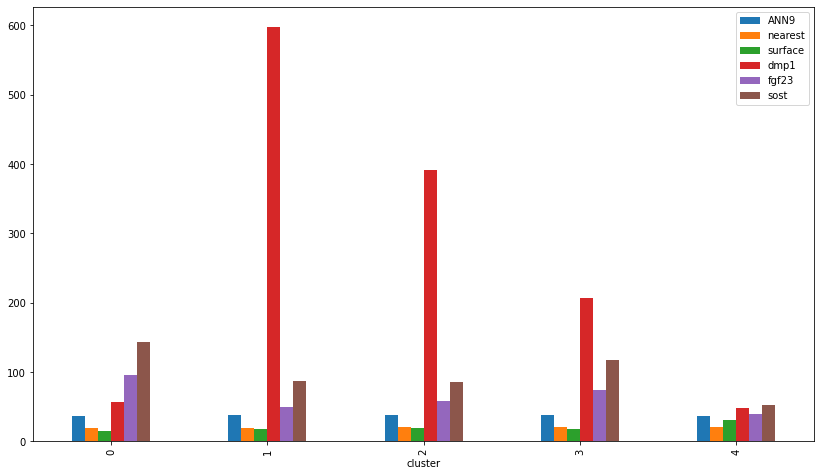

In [51]:
avgs_raw_new.plot.bar(figsize = (14,8))

In [49]:
YP_subset_UMAP.cluster.value_counts()

4    888
3    377
0    376
2    215
1    144
Name: cluster, dtype: int64

In [ ]:
#SOST - 6 features